import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
import kagglehub



### Data Preparation

download dataset di kaggle

In [2]:
# download data dari kaggle
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3M/24.3M [00:00<00:00, 35.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


load data csv

In [3]:
book_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Books.csv')
ratings_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Ratings.csv').sample(30000)
user_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Users.csv')


Merge dataset

In [4]:
# Menggabungkan semua dataset berdasarkan User-ID dan ISBN
merged_df = pd.merge(ratings_df, book_df, on='ISBN', how='inner')
merged_df = pd.merge(merged_df, user_df, on='User-ID', how='inner')

# Menampilkan 5 data teratas dari dataframe yang telah digabungkan
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,204864,0385194226,0,Night of the Ripper,Robert Block,1984,Bantam Dell Pub Group,http://images.amazon.com/images/P/0385194226.0...,http://images.amazon.com/images/P/0385194226.0...,http://images.amazon.com/images/P/0385194226.0...,"simi valley, california, usa",47.0
1,108700,0446350109,0,Windmills of the Gods,Sidney Sheldon,1987,Warner Books,http://images.amazon.com/images/P/0446350109.0...,http://images.amazon.com/images/P/0446350109.0...,http://images.amazon.com/images/P/0446350109.0...,"orlando, florida, usa",49.0
2,81298,0842329277,7,"Assassins: Assignment: Jerusalem, Target: Anti...",Tim Lahaye,2000,Tyndale House Publishers,http://images.amazon.com/images/P/0842329277.0...,http://images.amazon.com/images/P/0842329277.0...,http://images.amazon.com/images/P/0842329277.0...,"savannah, georgia, usa",20.0
3,51883,0590453653,0,"Welcome to Dead House (Goosebumps, No 1)",R. L. Stine,1995,Scholastic,http://images.amazon.com/images/P/0590453653.0...,http://images.amazon.com/images/P/0590453653.0...,http://images.amazon.com/images/P/0590453653.0...,"jasper, missouri, usa",31.0
4,128325,0061032093,0,Breathing Room (Avon Romance),Susan Elizabeth Phillips,2003,Avon Books,http://images.amazon.com/images/P/0061032093.0...,http://images.amazon.com/images/P/0061032093.0...,http://images.amazon.com/images/P/0061032093.0...,"toledo, ohio, usa",43.0


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26868 entries, 0 to 26867
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              26868 non-null  int64  
 1   ISBN                 26868 non-null  object 
 2   Book-Rating          26868 non-null  int64  
 3   Book-Title           26868 non-null  object 
 4   Book-Author          26868 non-null  object 
 5   Year-Of-Publication  26868 non-null  object 
 6   Publisher            26868 non-null  object 
 7   Image-URL-S          26868 non-null  object 
 8   Image-URL-M          26868 non-null  object 
 9   Image-URL-L          26868 non-null  object 
 10  Location             26868 non-null  object 
 11  Age                  19538 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


### Data Cleaning

cek duplikat

In [6]:
merged_df.duplicated().sum()

0

cek missing value

In [7]:
#cek null pada dataframe
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


cek ukuran dataframe

In [8]:
merged_df.shape

(26868, 12)

cek jumlah data keseluruhan

In [9]:
merged_df.size

322416

berdasarkan hasil cek data  memiliki banyak missing value

### EDA

cek unique value

In [10]:
# melihat nilai unik setiap variabel
merged_df.nunique()

,0
User-ID,10336
ISBN,20460
Book-Rating,11
Book-Title,19362
Book-Author,11039
Year-Of-Publication,119
Publisher,2721
Image-URL-S,20457
Image-URL-M,20457
Image-URL-L,20457


drop id karna tidak memiliki korelasi apapun

In [11]:
# menghilangkan data image url S dan M dari merged_df
df=merged_df.drop(['Image-URL-M','Image-URL-S'],axis=1)

### Univariate Analysis


visualisasi Distribusi Rating

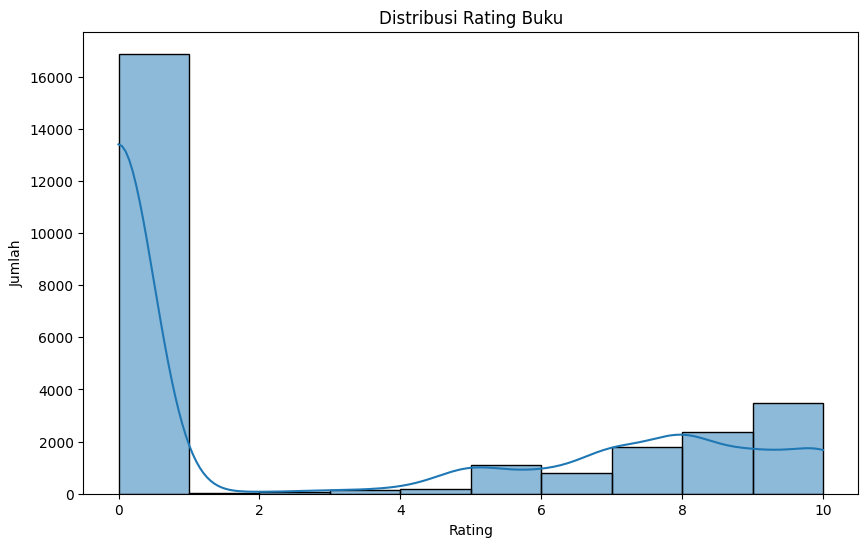

In [12]:
# Distribusi Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Book-Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

berdasarkan gambar diatas bahwa distribusi ratingnya right skewed dengan paling banyak rating 1.

visualisasi Distribusi tahun publikasi

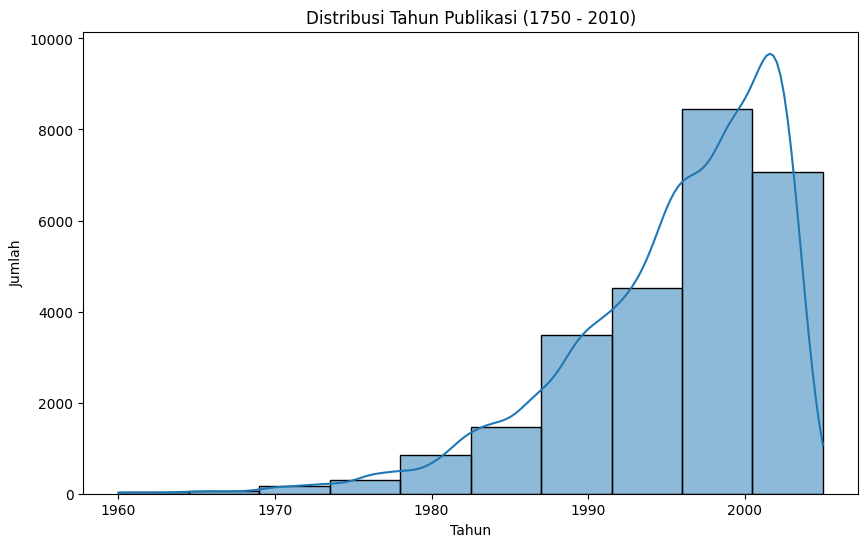

In [13]:
# Mengubah kolom 'Year-Of-Publication' menjadi integer
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

# Filter data untuk tahun antara 1750 dan 2010
df_filtered = df[(df['Year-Of-Publication'] >= 1960) & (df['Year-Of-Publication'] <= 2008)]

# Distribusi Tahun Publikasi
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Year-Of-Publication'], bins=10, kde=True)
plt.title('Distribusi Tahun Publikasi (1750 - 2010)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

berdasarkan gambar diatas bahwa distribusinya left skewed dengan kebanyakan tahun publikasi pada tahun 1990 sampai tahun 2000.

visualisasi outliers age dan rating

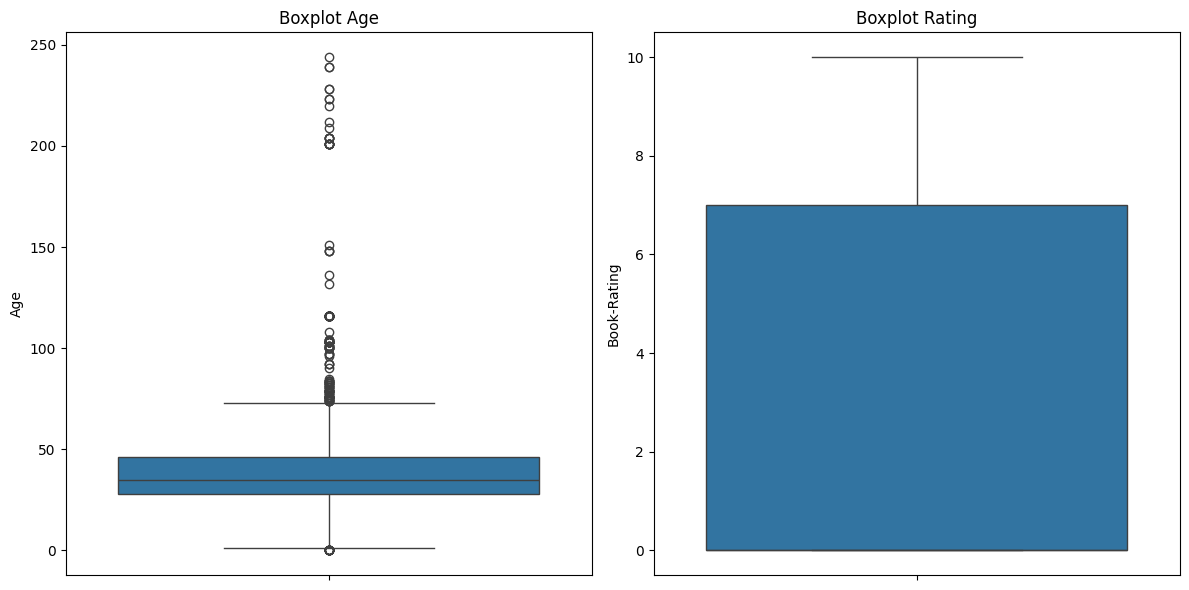

In [14]:
# Membuat visualisasi boxplot untuk Age dan Rating
plt.figure(figsize=(12, 6))

# Boxplot untuk Age
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Boxplot Age')

# Boxplot untuk Rating
plt.subplot(1, 2, 2)
sns.boxplot(y='Book-Rating', data=df)
plt.title('Boxplot Rating')

plt.tight_layout()
plt.show()


berdasarkan gambar diatas bahwa terdapat banyak nilai outliers pada age.

### Data Preprocessing

handling missing value

In [15]:
# Mengubah nilai null pada kolom 'Age' menggunakan teknik inputasi
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

handling outliers

In [16]:
# menghilangkan data outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24998 entries, 0 to 26867
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              24998 non-null  int64  
 1   ISBN                 24998 non-null  object 
 2   Book-Rating          24998 non-null  int64  
 3   Book-Title           24998 non-null  object 
 4   Book-Author          24998 non-null  object 
 5   Year-Of-Publication  24998 non-null  int64  
 6   Publisher            24998 non-null  object 
 7   Image-URL-L          24998 non-null  object 
 8   Location             24998 non-null  object 
 9   Age                  24998 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


### Modeling

#### model Collaborative Filtering

In [18]:
%pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357268 sha256=25b976a3368e8b9a86c447cb02ef2b6b8196ff41c3f5745fb891674359c1cfe4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Metode ini memanfaatkan data dari pengguna lain untuk memberikan rekomendasi. Dalam hal ini, model SVD (Singular Value Decomposition) digunakan untuk memprediksi rating buku berdasarkan pola rating dari pengguna lain.

Inisialisasi data dan skala rating untuk Collaborative Filtering

In [19]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_clean[['User-ID', 'ISBN', 'Book-Rating']], reader)



Membagi data menjadi train dan test set dengan perbandingan 80:20

In [20]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

membuat model SVD dengan parameter n_factor bernilai defaut yaitu 100 dan n_epochs  bernilai default yaitu 20.

In [21]:
svd_model = SVD()
svd_model.fit(trainset)

 Melakukan prediksi pada test set

In [22]:
predictions = svd_model.test(testset)

Evaluasi Collaborative Filtering menggunakan RMSE dan MSE

In [23]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 3.6087
MAE:  3.1681


membuat fungsi rekomendasi

In [24]:
def recommend_books(user_id, n=10):
    # List all unique book titles
    all_books = df_clean['Book-Title'].unique()

    # Remove books already rated by the user
    rated_books = df_clean[df_clean['User-ID'] == user_id]['Book-Title'].values
    books_to_predict = [book for book in all_books if book not in rated_books]

    # Predict ratings for remaining books
    predictions = []
    for book in books_to_predict:
        pred = svd_model.predict(user_id, book)
        predictions.append((book, pred.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_n = predictions[:n]
    print(f"Top 10 rekomendasi buku untuk user {user_id}:")
    # Iterate through 'top_n' instead of 'recommended_books'
    for i, (title, _) in enumerate(top_n, start=1):
        print(f"{i}. {title}")
    return top_n

inference

In [25]:
user_id = 271705
recommended_books = recommend_books(user_id)


Top 10 rekomendasi buku untuk user 271705:
1. Night of the Ripper
2. Windmills of the Gods
3. Assassins: Assignment: Jerusalem, Target: Antichrist (Left Behind No. 6)
4. Welcome to Dead House (Goosebumps, No 1)
5. Breathing Room (Avon Romance)
6. The Arch Conspirator
7. Marrying Money (Silhouette Romance, No 1519)
8. Solemn Oath (Er Trilogy)
9. Show of Evil
10. The Lions of Al-Rassan
